In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [8]:
df=pd.read_csv(r"C:\Users\MASUM\Machine Learning\SVM\UCI_Credit_Card.csv")

In [10]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [12]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [14]:
df.AGE.mean()

35.4855

In [16]:
x=df.drop(['default.payment.next.month'],axis=1)

In [18]:
x

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [22]:
y=df['default.payment.next.month']


In [24]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.svm import SVC

In [61]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [63]:
model= SVC(gamma='auto')

In [65]:
model.fit(xtrain,ytrain)

SVC(gamma='auto')

In [66]:
model.score(xtest,ytest)

0.7777777777777778

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf=RandomForestClassifier()

In [69]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [70]:
rf.score(xtest,ytest)

0.8158888888888889

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt=DecisionTreeClassifier()

In [73]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [86]:
dt.score(xtest,ytest)

0.7193333333333334

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn=KNeighborsClassifier()

In [92]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [94]:
knn.score(xtest,ytest)

0.75

In [96]:
from sklearn.linear_model import LogisticRegression

In [98]:
lr=LogisticRegression()

In [114]:
lr.fit(xtrain,ytrain)

C:\Users\MASUM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
lr.score(xtest,ytest)

0.7777777777777778

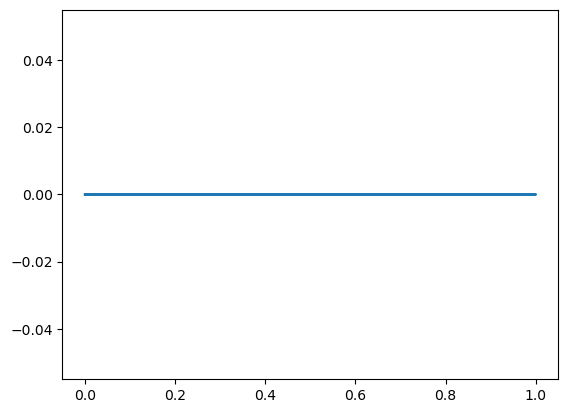

In [106]:
plt.plot(ytest,lr.predict(xtest))

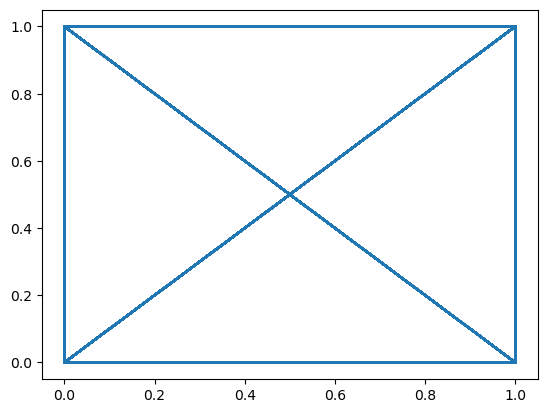

In [108]:
plt.plot(ytest,knn.predict(xtest))

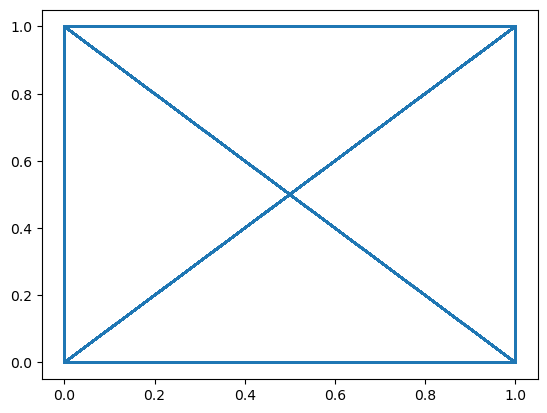

In [110]:
plt.plot(ytest,dt.predict(xtest))

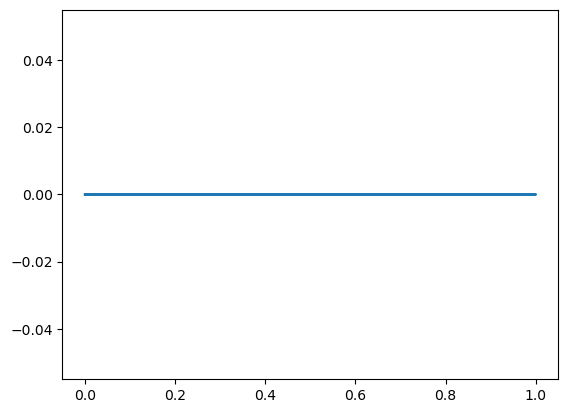

In [112]:
plt.plot(ytest,model.predict(xtest))